# Classification of Handwritten Digits

Example adapted from [scikit-learn docs](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, and performance metrics
from sklearn import datasets, metrics

# Import the Multi-Layer Perceptron Classifier. This is the model we will train.
from sklearn.neural_network import MLPClassifier

In [2]:
# This is a seed for the random number generator, we set this to make
# reproducible results
seed = 42

In [3]:
# The handwritten digits dataset
digits = datasets.load_digits()

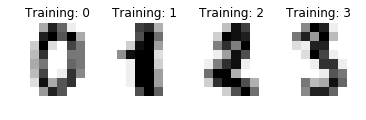

In [4]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)


In [5]:
# Each image right now is a 20 x 20 matrix of grayscale pixel values
# Here we print the first image's pixel values.
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [6]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
print(n_samples)

# Data is a list of vectors now, each vector is length 400, since the image dimensions are 20 x 20.
data = digits.images.reshape((n_samples, -1))

1797


In [7]:
# We need to now create our test and train splits

# We'll train on 70% of our data
train_size = int(n_samples * 0.70)
train_X = data[:train_size]
train_y = digits.target[:train_size]
print(len(train_X))

# The remaining samples are for our test set
test_size = n_samples - train_size
test_X = data[train_size:]
test_y = digits.target[train_size:]
print(len(test_X))

assert n_samples == (len(test_X) + len(train_X))

1257
540


### MLP: Multi-layer Perceptron Classifier
Read the [Docs](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

In [8]:
# Now, we initialize a classifier object and fit it to our training set
# TODO: Look at docs and add additional params here to try to increase
# accuracy after you go through the demo end-to-end.
classifier = MLPClassifier(random_state=seed)

In [10]:
# This fit() function is how we train the classifier
classifier.fit(train_X, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [11]:
# Now that we've finished training, get the test and train errors.
print("==================== AFTER TRAINING ====================")

train_error = classifier.score(train_X, train_y)
print("Train Error: {}".format(train_error))

test_error = classifier.score(test_X, test_y)
print("Test Error: {}".format(test_error))

==================== AFTER TRAINING ====================
Train Error: 1.0
Test Error: 0.9351851851851852


In [12]:
# Allow the classifier to make predictions on the test set using only the 
# features, not the labels
predicted = classifier.predict(test_X)

In [13]:
# TODO: Look up what precision, recall, and f1-score are.
# Explain why recall for 3 and 8 might be so low.
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(test_y, predicted)))

Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False):
             precision    recall  f1-score   support

          0       0.93      0.96      0.94        53
          1       0.98      0.91      0.94        53
          2       1.00      0.98      0.99        53
          3       0.96      0.85      0.90        53
          4       0.95      0.91      0.93        57
          5       0.93      0.98      0.96        56
          6       0.93      1.00      0.96        54
          7       0.94      0.93      0.93        54
          8       0.88      0.88      0.88        52

In [14]:
# TODO: Try to interpret what this might be.
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_y, predicted))

Confusion matrix:
[[51  0  0  0  1  0  1  0  0  0]
 [ 2 48  0  1  0  0  0  0  0  2]
 [ 0  0 52  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  2  0  1  5  0]
 [ 0  0  0  0 52  0  2  2  0  1]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  4]
 [ 1  1  0  0  2  1  0  0 46  1]
 [ 1  0  0  0  0  1  0  0  1 52]]


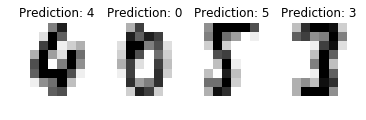

In [15]:
# It's nice to see visual representation of the results
images_and_predictions = list(zip(digits.images[train_size:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

In [16]:
# If you're running this outside of Jupyter notebook,
# uncomment this next line.
# plt.show()